**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict


import seaborn as sns

from sklearn.utils import shuffle
import itertools
import re

# Data Preparation

In [4]:
train = pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv", header=0)
test = pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv", header=0)

In [5]:
train = train.drop(train.columns[94:], axis=1)

In [6]:
test = test.drop(test.columns[94:], axis=1)

In [7]:
train.to_csv('train_corto.csv', index=False)

In [8]:
test.to_csv('test_corto.csv', index=False)  

In [9]:
train.drop('modality',  axis=1, inplace=True)
test.drop('modality', axis=1, inplace=True) 

In [10]:
train.drop('actor',  axis=1, inplace=True)
test.drop('actor', axis=1, inplace=True) 

In [11]:
train.drop('filename',  axis=1, inplace=True)
test.drop('filename', axis=1, inplace=True) 

In [12]:
#eliminiamo tutte le colonne con soli valori nulli
train.dropna(axis='columns', how='all', inplace=True)

In [13]:
#eliminiamo tutte le colonne con soli valori nulli
test.dropna(axis='columns', how='all', inplace=True)

In [14]:
for col in train.columns:
    if train[col].dtype == 'object':
        print("change column {} to categorical".format(col))
        data = train[col].unique()
        train[col].replace(train[col].unique(), list(range(0,len(data))), inplace=True)

print(train)

change column vocal_channel to categorical
change column emotion to categorical
change column emotional_intensity to categorical
change column statement to categorical
change column repetition to categorical
change column sex to categorical
      vocal_channel  emotion  emotional_intensity  statement  repetition  sex  \
0                 0        0                    0          0           0    0   
1                 0        0                    0          0           1    0   
2                 0        0                    0          1           0    0   
3                 0        0                    0          1           1    0   
4                 0        1                    0          0           0    0   
...             ...      ...                  ...        ...         ...  ...   
1823              0        7                    0          1           1    1   
1824              0        7                    1          0           0    1   
1825              0        7  

In [15]:
for col in test.columns:
    if test[col].dtype == 'object':
        print("change column {} to categorical".format(col))
        data = test[col].unique()
        test[col].replace(test[col].unique(), list(range(0,len(data))), inplace=True)

print(test)

change column vocal_channel to categorical
change column emotion to categorical
change column emotional_intensity to categorical
change column statement to categorical
change column repetition to categorical
change column sex to categorical
     vocal_channel  emotion  emotional_intensity  statement  repetition  sex  \
0                0        0                    0          0           0    0   
1                0        0                    0          0           1    0   
2                0        0                    0          1           0    0   
3                0        0                    0          1           1    0   
4                0        1                    0          0           0    0   
..             ...      ...                  ...        ...         ...  ...   
619              1        5                    0          1           1    1   
620              1        5                    1          0           0    1   
621              1        5            

In [16]:
# Estraggo le variabili target dal train e test set (emotion)
y_train1 = train.pop('vocal_channel')
y_test1 = test.pop('vocal_channel')

In [17]:
X_train1 = train

In [18]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 90 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emotion              1828 non-null   int64  
 1   emotional_intensity  1828 non-null   int64  
 2   statement            1828 non-null   int64  
 3   repetition           1828 non-null   int64  
 4   sex                  1828 non-null   int64  
 5   frame_count          1828 non-null   int64  
 6   sum                  1828 non-null   float64
 7   mean                 1828 non-null   float64
 8   std                  1828 non-null   float64
 9   min                  1828 non-null   float64
 10  max                  1828 non-null   float64
 11  q01                  1828 non-null   float64
 12  q05                  1828 non-null   float64
 13  q25                  1828 non-null   float64
 14  q50                  1828 non-null   float64
 15  q75                  1828 non-null   f

In [19]:
X_test1 = test

In [20]:
#visualizzazione one-hot per X_train1

categorical_cols_emotion = ["emotion"]
X_train1 = pd.get_dummies(X_train1, columns=categorical_cols_emotion)
X = X_train1.values

categorical_cols_emotion = ["emotional_intensity"]
X_train1 = pd.get_dummies(X_train1, columns=categorical_cols_emotion)
X = X_train1.values

categorical_cols_emotion = ["statement"]
X_train1 = pd.get_dummies(X_train1, columns=categorical_cols_emotion)
X = X_train1.values

categorical_cols_emotion = ["repetition"]
X_train1 = pd.get_dummies(X_train1, columns=categorical_cols_emotion)
X = X_train1.values

categorical_cols_emotion = ["sex"]
X_train1 = pd.get_dummies(X_train1, columns=categorical_cols_emotion)
X = X_train1.values

X_train1.head()

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,emotion_6,emotion_7,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
0,158558,0.145081,9.150000e-07,0.004001,-0.038422,0.040588,-0.012586,-0.005890,-0.000031,0.0,...,0,0,1,0,1,0,1,0,1,0
1,160160,0.114319,7.137790e-07,0.004283,-0.042603,0.048157,-0.013550,-0.006104,-0.000031,0.0,...,0,0,1,0,1,0,0,1,1,0
2,156956,0.149963,9.554485e-07,0.005084,-0.037018,0.058472,-0.015822,-0.007294,0.000000,0.0,...,0,0,1,0,0,1,1,0,1,0
3,152152,0.139618,9.176213e-07,0.004886,-0.036652,0.062683,-0.014923,-0.006714,-0.000031,0.0,...,0,0,1,0,0,1,0,1,1,0
4,169769,0.137665,8.108948e-07,0.002956,-0.026245,0.026215,-0.009399,-0.004364,-0.000031,0.0,...,0,0,1,0,1,0,1,0,1,0


In [21]:
#visualizzazione one-hot per X_test1

categorical_cols_emotion = ["emotion"]
X_test1 = pd.get_dummies(X_test1, columns=categorical_cols_emotion)
X = X_test1.values

categorical_cols_emotion = ["emotional_intensity"]
X_test1 = pd.get_dummies(X_test1, columns=categorical_cols_emotion)
X = X_test1.values

categorical_cols_emotion = ["statement"]
X_test1 = pd.get_dummies(X_test1, columns=categorical_cols_emotion)
X = X_test1.values

categorical_cols_emotion = ["repetition"]
X_test1 = pd.get_dummies(X_test1, columns=categorical_cols_emotion)
X = X_test1.values

categorical_cols_emotion = ["sex"]
X_test1 = pd.get_dummies(X_test1, columns=categorical_cols_emotion)
X = X_test1.values

X_test1.head()

,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,...,emotion_6,emotion_7,emotional_intensity_0,emotional_intensity_1,statement_0,statement_1,repetition_0,repetition_1,sex_0,sex_1
0,161762,0.475616,2.940224e-06,0.003693,-0.031128,0.031067,-0.013580,-0.005890,-0.000092,0.0,...,0,0,1,0,1,0,1,0,1,0
1,155355,0.120148,7.733752e-07,0.003508,-0.032715,0.032654,-0.012207,-0.005432,-0.000122,0.0,...,0,0,1,0,1,0,0,1,1,0
2,160160,-0.599304,-3.741909e-06,0.003363,-0.023743,0.021729,-0.012085,-0.005890,-0.000061,0.0,...,0,0,1,0,0,1,1,0,1,0
3,158558,-0.080383,-5.069646e-07,0.004150,-0.041626,0.033051,-0.014526,-0.006439,-0.000092,0.0,...,0,0,1,0,0,1,0,1,1,0
4,176176,0.152222,8.640319e-07,0.001767,-0.014404,0.011810,-0.007172,-0.002930,-0.000061,0.0,...,0,0,1,0,1,0,1,0,1,0


In [22]:
#distribuzione classi target
y_train1.value_counts()

0    1080
1     748
Name: vocal_channel, dtype: int64

In [23]:
y_test1.value_counts()

0    360
1    264
Name: vocal_channel, dtype: int64

In [24]:
def minmax_norm(X_train1_input):
    return (X_train1 - X_train1.min()) / ( X_train1.max() - X_train1.min())

X_train1_minmax_norm = minmax_norm(X_train1)

print(X_train1_minmax_norm)

      frame_count       sum      mean       std       min       max       q01  \
0        0.107840  0.385871  0.435971  0.022102  0.967474  0.036119  0.979319   
1        0.117646  0.385792  0.435878  0.023967  0.963262  0.043729  0.977355   
2        0.098033  0.385883  0.435989  0.029249  0.968888  0.054101  0.972723   
3        0.068626  0.385857  0.435972  0.027946  0.969257  0.058336  0.974555   
4        0.176466  0.385852  0.435923  0.015209  0.979741  0.021665  0.985816   
...           ...       ...       ...       ...       ...       ...       ...   
1823     0.166666  0.385107  0.435124  0.031328  0.972209  0.030257  0.965099   
1824     0.205885  0.385144  0.435179  0.053698  0.933749  0.068678  0.942827   
1825     0.176472  0.384963  0.434975  0.061256  0.949551  0.065302  0.938908   
1826     0.274511  0.385282  0.435335  0.076355  0.935194  0.065670  0.924723   
1827     0.205879  0.385003  0.435032  0.059449  0.942818  0.061067  0.940339   

           q05       q25   

In [25]:
def minmax_norm(X_test1_input):
    return (X_test1 - X_test1.min()) / ( X_test1.max() - X_test1.min())

X_test1_minmax_norm = minmax_norm(X_test1)

print(X_test1_minmax_norm)

     frame_count       sum      mean       std       min       max       q01  \
0       0.090907  0.380904  0.391299  0.021524  0.974882  0.025626  0.977625   
1       0.050499  0.363973  0.373194  0.020201  0.973283  0.027224  0.980430   
2       0.080803  0.329705  0.335466  0.019156  0.982322  0.016224  0.980679   
3       0.070700  0.354421  0.362496  0.024803  0.964305  0.027623  0.975693   
4       0.181814  0.365500  0.373951  0.007708  0.991730  0.006238  0.990714   
..           ...       ...       ...       ...       ...       ...       ...   
619     0.454540  0.378405  0.382846  0.099552  0.911117  0.134859  0.916173   
620     0.444437  0.292718  0.313953  0.178630  0.785003  0.273898  0.834963   
621     0.373731  0.385578  0.389936  0.184546  0.855131  0.199570  0.843751   
622     0.353536  0.396000  0.399290  0.184799  0.810552  0.234322  0.849984   
623     0.414139  0.375184  0.380678  0.240388  0.770676  0.229375  0.786288   

          q05       q25  q50  ...  emot

In [64]:
def minmax_norm(y_train1_input):
    return (y_train1 - y_train1.min()) / ( y_train1.max() - y_train1.min())

y_train1_minmax_norm = minmax_norm(y_train1)

print(y_train1_minmax_norm)

[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1.]


In [65]:
def minmax_norm(y_test1_input):
    return (y_test1 - y_test1.min()) / ( y_test1.max() - y_test1.min())

y_test1_minmax_norm = minmax_norm(y_test1)

print(y_test1_minmax_norm)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
619    1.0
620    1.0
621    1.0
622    1.0
623    1.0
Name: vocal_channel, Length: 624, dtype: float64


# Data Partitioning

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [31]:
y_train1

0       0
1       0
2       0
3       0
4       0
       ..
1823    0
1824    0
1825    0
1826    0
1827    0
Name: vocal_channel, Length: 1828, dtype: int64

In [32]:
y_test1

0      0
1      0
2      0
3      0
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Name: vocal_channel, Length: 624, dtype: int64

In [61]:
X_train1 = X_train1_minmax_norm
X_test1 = X_test1_minmax_norm

y_train = y_train1_minmax_norm

In [62]:
y_test1

0      0
1      0
2      0
3      0
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Name: vocal_channel, Length: 624, dtype: int64

In [63]:
y_train1

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

# PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train1)
X_pca = pca.transform(X_train1)

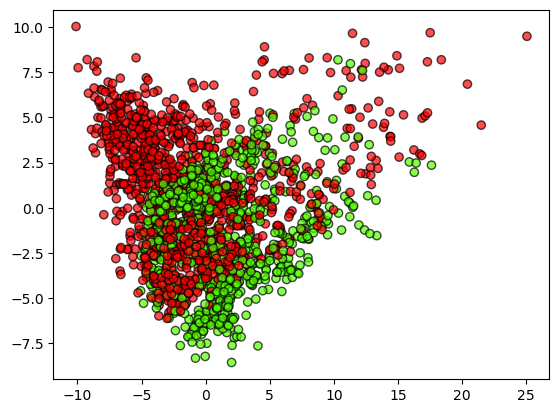

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [51]:
df1 = pd.DataFrame(X_train1)
df2 = pd.DataFrame(X_test1)
df3 = pd.DataFrame(y_train1)
df4 = pd.DataFrame(y_test1)

In [50]:
df

,0,1
0,4.218503,2.234192
1,0.907799,0.459844
2,-0.276525,5.081278
3,0.088484,2.322991
4,3.243297,1.214606
...,...,...
95,-1.576720,4.957406
96,1.411649,-1.325739
97,3.004688,0.985215
98,-0.637628,4.091047


In [52]:
df2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-1.152911,0.049885,0.059131,-0.795878,0.757492,-0.752505,0.772959,0.815481,0.566262,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
1,-1.377935,0.011680,0.015160,-0.804879,0.748415,-0.744282,0.792753,0.830228,0.547461,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,1.0,-1.0,-1.0,1.0,0.976213,-0.976213
2,-1.209176,-0.065647,-0.076467,-0.811989,0.799734,-0.800895,0.794513,0.815481,0.585063,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,-1.0,1.0,1.0,-1.0,0.976213,-0.976213
3,-1.265441,-0.009873,-0.010822,-0.773573,0.697445,-0.742226,0.759323,0.797785,0.566262,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,0.976213,-0.976213
4,-0.646668,0.015127,0.016999,-0.889868,0.853147,-0.852291,0.865332,0.910842,0.585063,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,1.0,-1.0,1.0,-1.0,0.976213,-0.976213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.872095,0.044247,0.038601,-0.265064,0.395466,-0.190319,0.339248,0.213821,-0.166977,-0.063106,...,-0.292422,-0.292422,0.926134,-0.926134,-1.0,1.0,-1.0,1.0,-1.024367,1.024367
620,0.815830,-0.149110,-0.128713,0.272896,-0.320555,0.525262,-0.233902,-0.218744,-0.110574,-0.063106,...,-0.292422,-0.292422,-1.079758,1.079758,1.0,-1.0,1.0,-1.0,-1.024367,1.024367
621,0.422082,0.060434,0.055820,0.313141,0.077603,0.142723,-0.171880,-0.411433,-0.467793,-0.063106,...,-0.292422,-0.292422,-1.079758,1.079758,1.0,-1.0,-1.0,1.0,-1.024367,1.024367
622,0.309623,0.083952,0.078537,0.314866,-0.175501,0.321579,-0.127893,-0.485165,-0.430191,-0.063106,...,-0.292422,-0.292422,-1.079758,1.079758,-1.0,1.0,1.0,-1.0,-1.024367,1.024367


In [56]:
df4

,vocal_channel
0,0
1,0
2,0
3,0
4,0
...,...
619,1
620,1
621,1
622,1


# Linear SVM

In [36]:
from sklearn.svm import LinearSVC

In [37]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9503205128205128
F1-score [0.95539568 0.94394213]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       360
           1       0.90      0.99      0.94       264

    accuracy                           0.95       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.95      0.95      0.95       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9551282051282052
F1-score [0.95977011 0.94927536]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       360
           1       0.91      0.99      0.95       264

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9487179487179487
F1-score [0.95375723 0.94244604]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
           1       0.90      0.99      0.94       264

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



In [40]:
decision_function = clf.decision_function(X_train1)
support_vector_indices = np.where((2 * y_train1 - 1) * decision_function <= 1)[0]
support_vectors = X_train1[support_vector_indices]

In [41]:
support_vectors_pca = pca.transform(support_vectors)

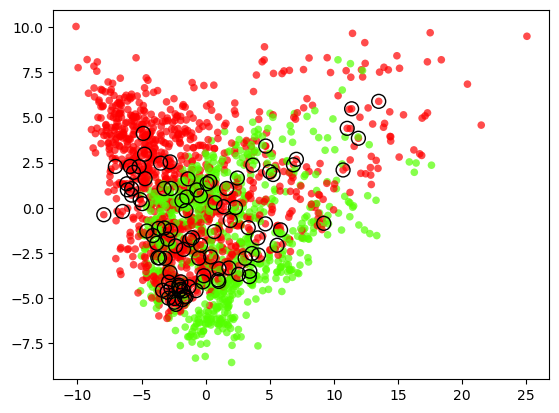

In [42]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [43]:
clf.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 0.001,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 101,
 'classes_': array([0, 1]),
 'coef_': array([[ 2.13045806e-01,  2.32306375e-03,  3.68084105e-03,
         -1.10468862e-02,  1.89587866e-02, -3.02274984e-03,
          2.33830167e-02, -1.84629506e-02, -4.17448072e-02,
          4.64439354e-03,  9.43930255e-02,  9.15189614e-03,
         -3.46070620e-02, -1.32992840e-01, -2.80337347e-02,
          6.47858172e-03,  5.17336403e-03, -1.07426743e-02,
         -1.58218294e-03, -2.00867149e-02,  2.28050080e-02,
          1.53237959e-02, -4.29751970e-02,  0.00000000e+00,
         -4.68779417e-02, -2.14233393e-03, -1.48615068e-02,
         -7.43774632e-02,  2.17252573e-02,  3.16946309e-02,
         -6.91409606e-02, -6.10204315e-02,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00

In [44]:
X_train1

array([[-1.26544058,  0.01435934,  0.01803374, ..., -1.        ,
         0.97621281, -0.97621281],
       [-1.20917578,  0.01105308,  0.01395045, ...,  1.        ,
         0.97621281, -0.97621281],
       [-1.32170538,  0.01488414,  0.01885454, ..., -1.        ,
         0.97621281, -0.97621281],
       ...,
       [-0.87165724, -0.02390865, -0.0257509 , ...,  1.        ,
        -1.02436681,  1.02436681],
       [-0.30914976, -0.01046385, -0.00991385, ..., -1.        ,
        -1.02436681,  1.02436681],
       [-0.7029331 , -0.022226  , -0.02323717, ...,  1.        ,
        -1.02436681,  1.02436681]])

## Effect of C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


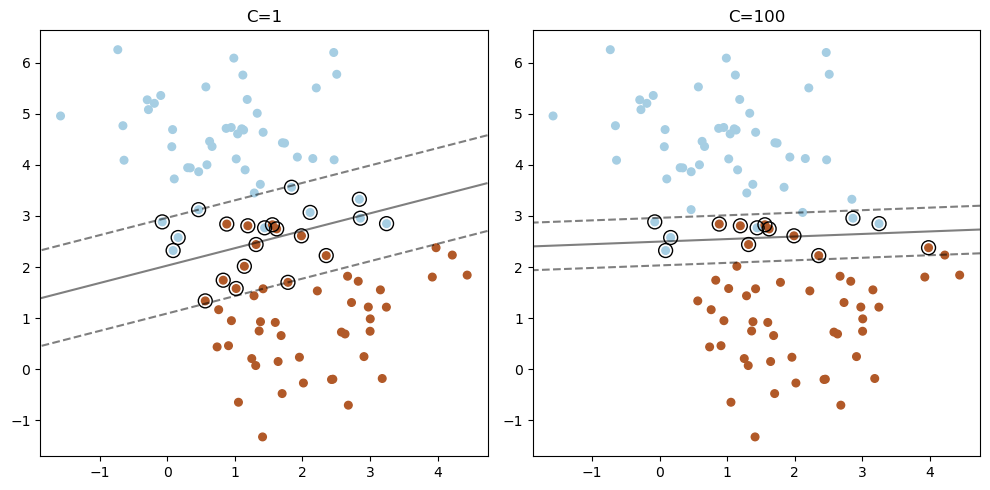

In [45]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X_train1, y_train1= make_blobs(n_samples=100, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train1, y_train1)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train1)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y_train1 - 1) * decision_function <= 1)[0]
    support_vectors = X_train1[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    #plt.scatter(clf.coef_[:, 0] + clf.intercept_, clf.coef_[:, 1] + clf.intercept_)
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [45]:
clf = SVC(gamma='auto')
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

ValueError: X has 101 features, but SVC is expecting 2 features as input.

In [ ]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

In [ ]:
clf.support_

In [ ]:
support_vectors_pca = pca.transform(clf.support_vectors_) #[:10]

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train1, 
            cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
clf.n_support_, len(X_train1)

## Effect of Different Kernels

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

/var/folders/k2/_q7jj7754nn3_3h7vr9wvn2c0000gn/T/ipykernel_2832/1555504895.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y[order].astype(np.float)


NameError: name 'SVC' is not defined